In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '186.2 thousand',
 5: '371.6 thousand',
 10: '534.9 thousand',
 20: '836.5 thousand',
 30: '1.2 million',
 40: '1.5 million',
 50: '2.0 million',
 60: '2.6 million',
 70: '3.4 million',
 80: '4.6 million',
 90: '7.2 million',
 95: '10.4 million',
 99: '20.6 million'}
-
## Actual GPT-3 estimated to be ##
{1: '185.7 thousand',
 5: '323.2 thousand',
 10: '439.3 thousand',
 20: '638.6 thousand',
 30: '840.4 thousand',
 40: '1.1 million',
 50: '1.3 million',
 60: '1.6 million',
 70: '2.0 million',
 80: '2.7 million',
 90: '3.8 million',
 95: '5.2 million',
 99: '9.4 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.1th percentile of the model
-


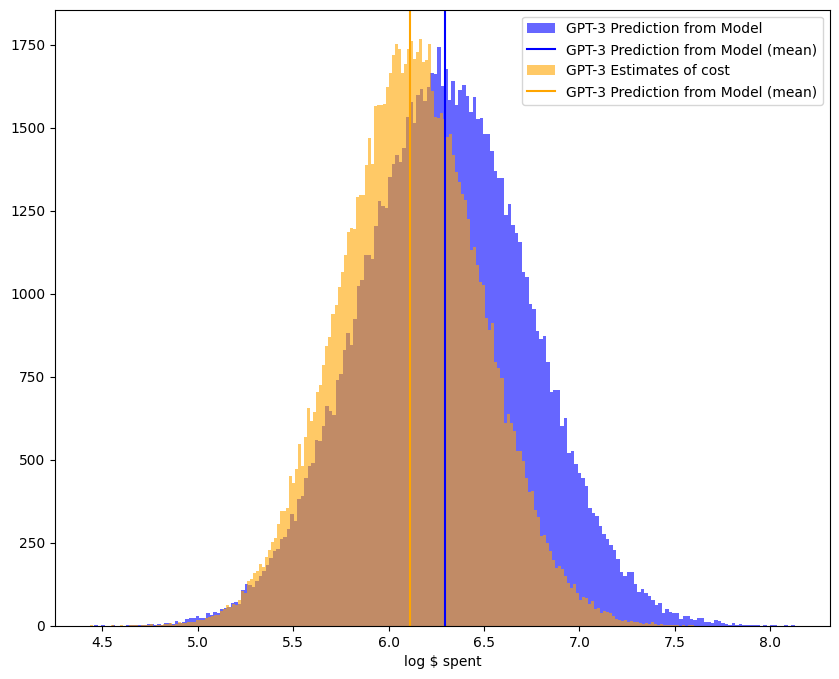

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '3.7 million',
 5: '5.7 million',
 10: '7.1 million',
 20: '9.3 million',
 30: '11.4 million',
 40: '13.5 million',
 50: '15.8 million',
 60: '18.5 million',
 70: '21.8 million',
 80: '26.6 million',
 90: '35.1 million',
 95: '44.1 million',
 99: '67.8 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3.2 million',
 5: '5.8 million',
 10: '7.8 million',
 20: '11.4 million',
 30: '14.9 million',
 40: '18.8 million',
 50: '23.2 million',
 60: '28.8 million',
 70: '36.1 million',
 80: '47.1 million',
 90: '68.4 million',
 95: '93.0 million',
 99: '165.2 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.5th percentile of the model
-


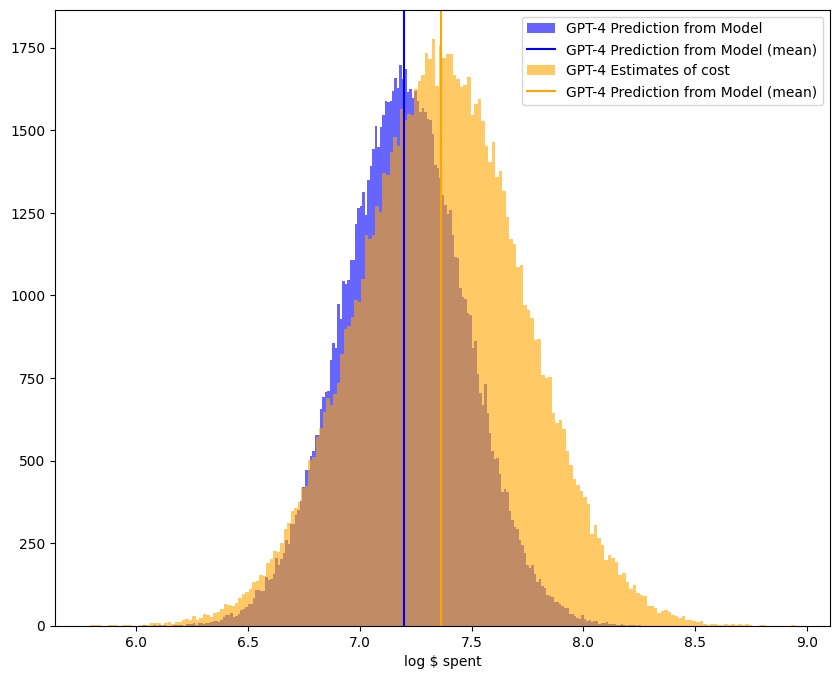

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2.4 million',
 5: '7.4 million',
 10: '13.3 million',
 20: '27.5 million',
 30: '46.6 million',
 40: '72.7 million',
 50: '110.7 million',
 60: '168.0 million',
 70: '262.0 million',
 80: '440.7 million',
 90: '904.6 million',
 95: '1.6 billion',
 99: '4.6 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '4.5 million',
 5: '8.1 million',
 10: '10.9 million',
 20: '15.8 million',
 30: '20.6 million',
 40: '25.9 million',
 50: '32.1 million',
 60: '39.7 million',
 70: '49.7 million',
 80: '65.0 million',
 90: '94.7 million',
 95: '129.7 million',
 99: '231.4 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 22.7th percentile of the model
-


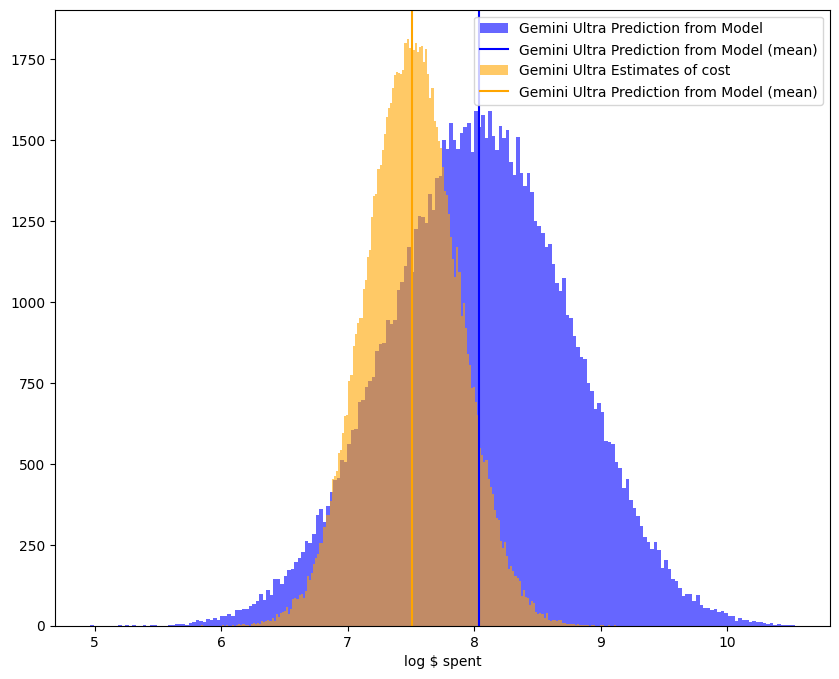

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Mistral Large Prediction (for calibration)

## Model predicts Mistral large spend will be ##
{1: '3.0 million',
 5: '5.1 million',
 10: '6.7 million',
 20: '9.2 million',
 30: '11.6 million',
 40: '14.2 million',
 50: '17.2 million',
 60: '20.7 million',
 70: '25.3 million',
 80: '32.0 million',
 90: '44.0 million',
 95: '57.6 million',
 99: '95.0 million'}
-
## Actual Mistral large estimated to be ##
{1: '2.8 million',
 5: '5.0 million',
 10: '6.8 million',
 20: '9.8 million',
 30: '12.8 million',
 40: '16.1 million',
 50: '20.0 million',
 60: '24.7 million',
 70: '31.0 million',
 80: '40.4 million',
 90: '58.7 million',
 95: '79.8 million',
 99: '141.5 million'}
-
Actual spend on Mistral large ($20.0M) is at the 58.2th percentile of the model
-


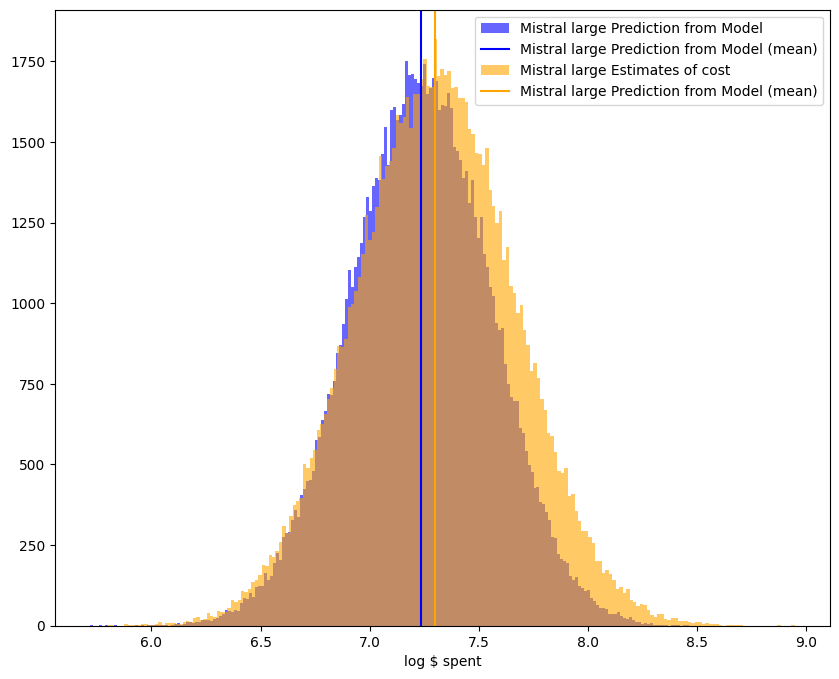

In [5]:
mistral_prediction = lab_spend_on_largest_model_this_year(total_investment=600*M,
                                                          total_revenue=0,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_revenue_that_is_profit=0,
                                                          percent_profit_spent_this_year=0,
                                                          percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                          percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
samples = mistral_prediction @ (100*K)

# 2e25 FLOP per https://epochai.org/blog/tracking-compute-intensive-ai-models
# Guess ~1e18 FLOP per $
# = 2e7 cost
actual_mistral_spend = 20*M

plot_model_versus_estimate('Mistral large', samples, actual_mistral_spend)

## Model for Largest Training Run by EOY2025

## SPEND ESTIMATE ##

$185.1 million (80%CI: $52.0 million to $666.7 million)

{1: '18.4 million',
 5: '36.3 million',
 10: '52.0 million',
 20: '80.0 million',
 30: '109.2 million',
 40: '142.9 million',
 50: '184.6 million',
 60: '237.3 million',
 70: '310.7 million',
 80: '427.7 million',
 90: '666.7 million',
 95: '964.9 million',
 99: '1.9 billion'}



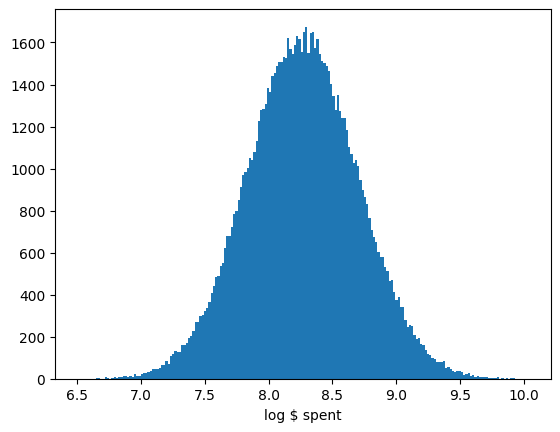



## FLOP ESTIMATE ##

27.07 log FLOP (80%CI: 26.34 to 27.79 log FLOP)

{1: 25.75,
 5: 26.14,
 10: 26.34,
 20: 26.59,
 30: 26.77,
 40: 26.92,
 50: 27.07,
 60: 27.21,
 70: 27.36,
 80: 27.54,
 90: 27.79,
 95: 28.0,
 99: 28.39}



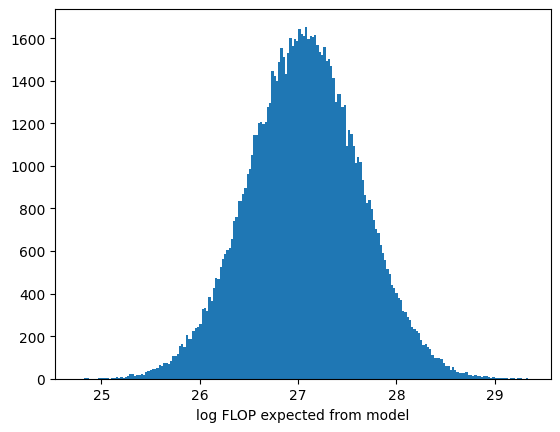

In [6]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 50*B),
                                                                       total_revenue=sq.lognorm(3*B, 12*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$108.9 million (80%CI: $31.4 million to $381.9 million)

{1: '11.7 million',
 5: '22.2 million',
 10: '31.4 million',
 20: '47.9 million',
 30: '65.5 million',
 40: '85.2 million',
 50: '108.6 million',
 60: '138.7 million',
 70: '180.6 million',
 80: '245.9 million',
 90: '381.9 million',
 95: '540.5 million',
 99: '1.0 billion'}



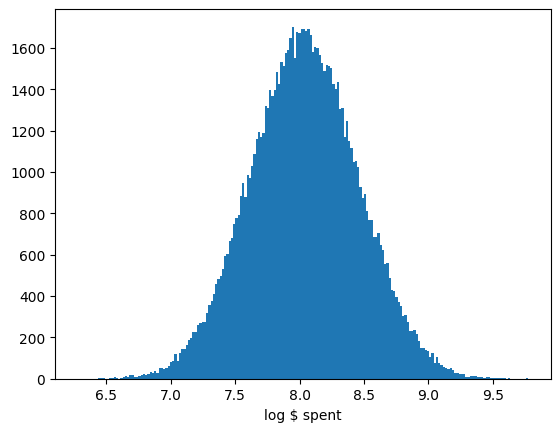



## FLOP ESTIMATE ##

26.84 log FLOP (80%CI: 26.12 to 27.55 log FLOP)

{1: 25.54,
 5: 25.92,
 10: 26.12,
 20: 26.37,
 30: 26.54,
 40: 26.7,
 50: 26.84,
 60: 26.98,
 70: 27.13,
 80: 27.3,
 90: 27.55,
 95: 27.76,
 99: 28.14}



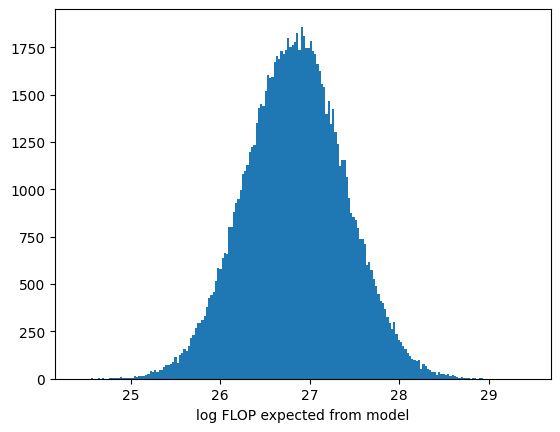

In [7]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(3*B, 20*B),
                                                                          total_revenue=sq.lognorm(1*B, 8*B),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.15, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$147.2 million (80%CI: $17.1 million to $1.3 billion)

{1: '3.1 million',
 5: '9.3 million',
 10: '17.1 million',
 20: '35.7 million',
 30: '61.3 million',
 40: '96.8 million',
 50: '148.7 million',
 60: '226.3 million',
 70: '358.2 million',
 80: '608.5 million',
 90: '1.3 billion',
 95: '2.3 billion',
 99: '6.7 billion'}



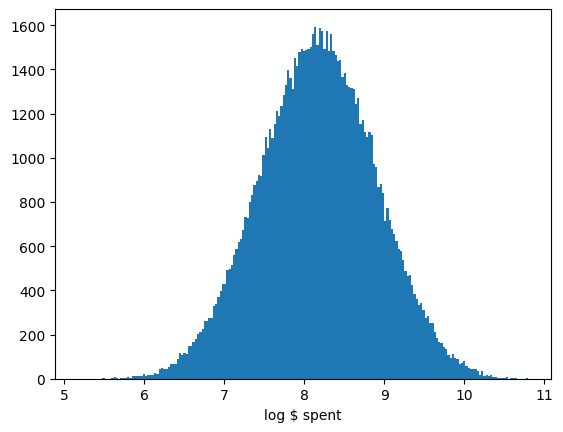



## FLOP ESTIMATE ##

26.97 log FLOP (80%CI: 25.92 to 28.01 log FLOP)

{1: 25.08,
 5: 25.63,
 10: 25.92,
 20: 26.28,
 30: 26.54,
 40: 26.76,
 50: 26.97,
 60: 27.18,
 70: 27.4,
 80: 27.65,
 90: 28.01,
 95: 28.3,
 99: 28.83}



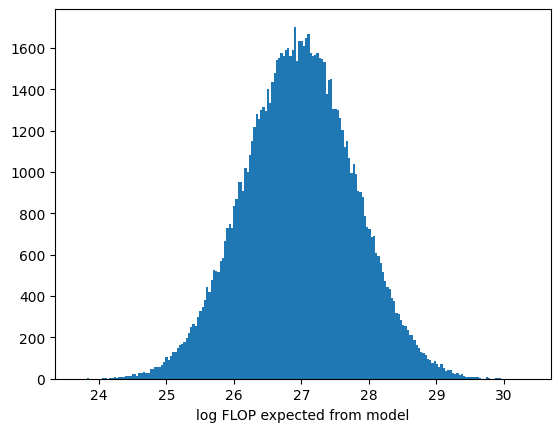

In [8]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 90*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
show_model_forecast(largest_google_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$27.1 million (80%CI: $2.7 million to $312.2 million)

{1: '775.0 thousand',
 5: '1.6 million',
 10: '2.7 million',
 20: '5.2 million',
 30: '9.1 million',
 40: '15.1 million',
 50: '24.8 million',
 60: '41.0 million',
 70: '69.7 million',
 80: '130.2 million',
 90: '312.2 million',
 95: '641.2 million',
 99: '2.3 billion'}



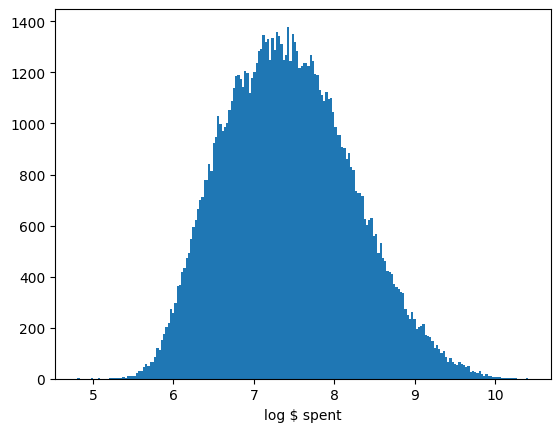



## FLOP ESTIMATE ##

26.23 log FLOP (80%CI: 25.12 to 27.39 log FLOP)

{1: 24.42,
 5: 24.86,
 10: 25.12,
 20: 25.47,
 30: 25.73,
 40: 25.97,
 50: 26.2,
 60: 26.43,
 70: 26.68,
 80: 26.98,
 90: 27.39,
 95: 27.72,
 99: 28.34}



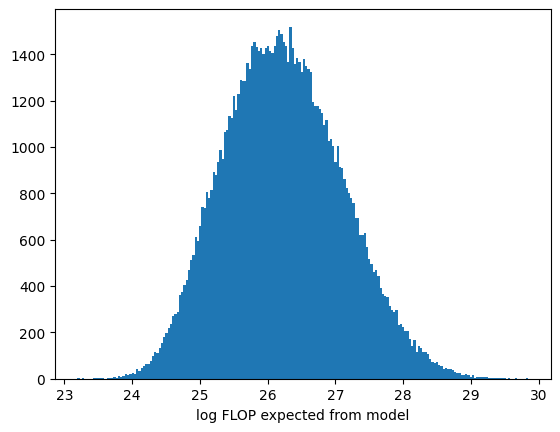

In [9]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 90*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
show_model_forecast(largest_microsoft_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$46.9 million (80%CI: $3.2 million to $688.8 million)

{1: '369.8 thousand',
 5: '1.5 million',
 10: '3.2 million',
 20: '8.0 million',
 30: '15.5 million',
 40: '27.6 million',
 50: '47.5 million',
 60: '80.7 million',
 70: '143.7 million',
 80: '279.7 million',
 90: '688.8 million',
 95: '1.4 billion',
 99: '5.1 billion'}



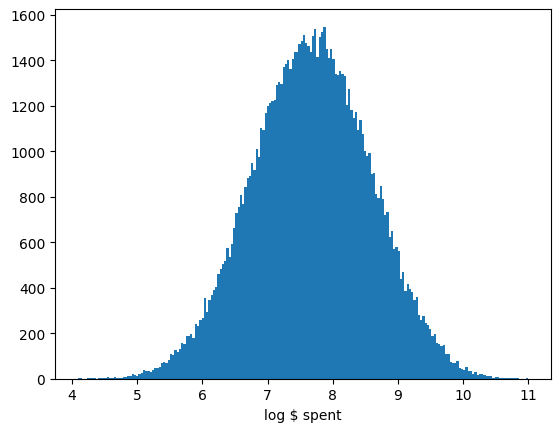



## FLOP ESTIMATE ##

26.47 log FLOP (80%CI: 25.21 to 27.73 log FLOP)

{1: 24.2,
 5: 24.86,
 10: 25.21,
 20: 25.65,
 30: 25.96,
 40: 26.22,
 50: 26.48,
 60: 26.73,
 70: 27.0,
 80: 27.31,
 90: 27.73,
 95: 28.07,
 99: 28.7}



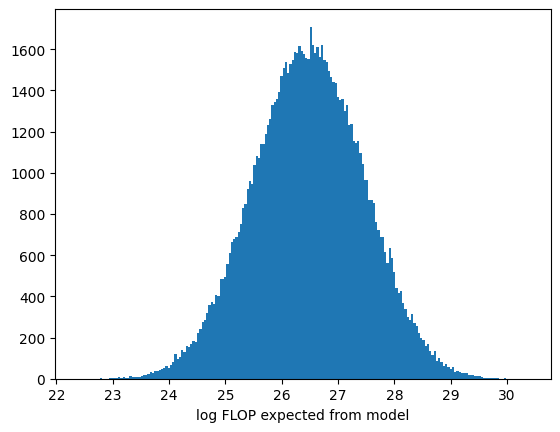

In [10]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(20*B, 90*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.4),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.2))
show_model_forecast(largest_fb_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$45.3 million (80%CI: $4.6 million to $450.2 million)

{1: '746.5 thousand',
 5: '2.4 million',
 10: '4.6 million',
 20: '10.1 million',
 30: '17.9 million',
 40: '29.1 million',
 50: '45.6 million',
 60: '71.3 million',
 70: '116.1 million',
 80: '204.5 million',
 90: '450.2 million',
 95: '847.3 million',
 99: '2.6 billion'}



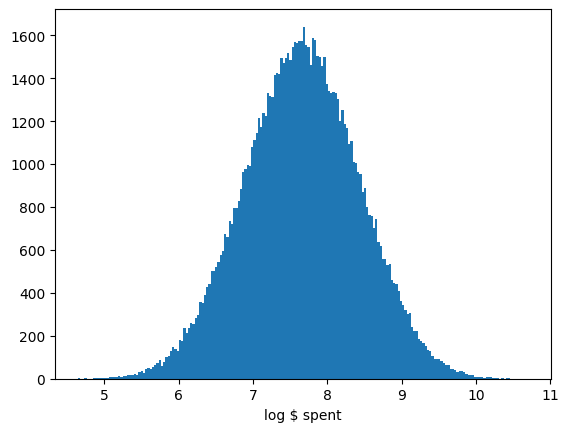



## FLOP ESTIMATE ##

26.46 log FLOP (80%CI: 25.36 to 27.55 log FLOP)

{1: 24.47,
 5: 25.05,
 10: 25.36,
 20: 25.73,
 30: 26.01,
 40: 26.24,
 50: 26.46,
 60: 26.67,
 70: 26.91,
 80: 27.18,
 90: 27.55,
 95: 27.86,
 99: 28.43}



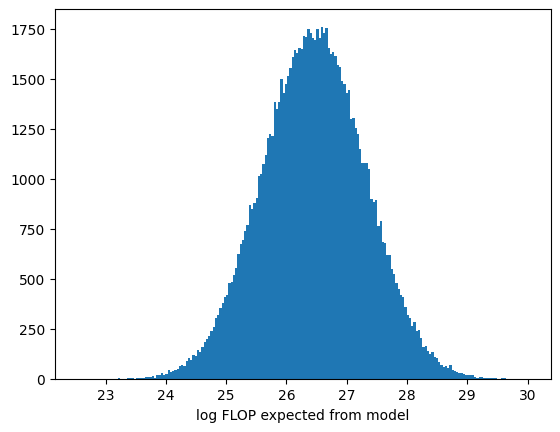

In [11]:
largest_amazon_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(50*B, 90*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.01, 0.3),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.1))
show_model_forecast(largest_amazon_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$69.7 million (80%CI: $21.3 million to $228.6 million)

{1: '8.2 million',
 5: '15.2 million',
 10: '21.3 million',
 20: '31.9 million',
 30: '42.8 million',
 40: '55.2 million',
 50: '69.8 million',
 60: '88.2 million',
 70: '113.2 million',
 80: '151.9 million',
 90: '228.6 million',
 95: '320.0 million',
 99: '599.3 million'}



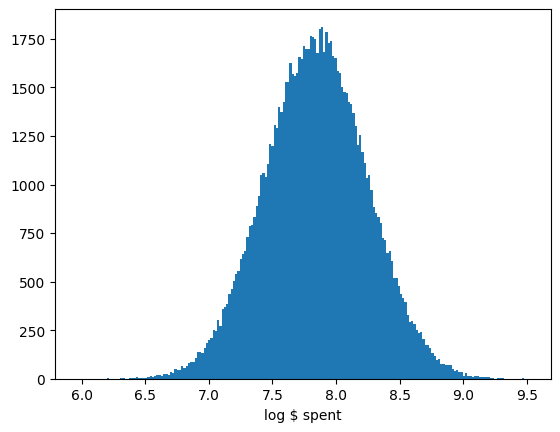



## FLOP ESTIMATE ##

26.64 log FLOP (80%CI: 25.95 to 27.34 log FLOP)

{1: 25.39,
 5: 25.75,
 10: 25.95,
 20: 26.19,
 30: 26.36,
 40: 26.51,
 50: 26.64,
 60: 26.78,
 70: 26.93,
 80: 27.1,
 90: 27.34,
 95: 27.53,
 99: 27.9}



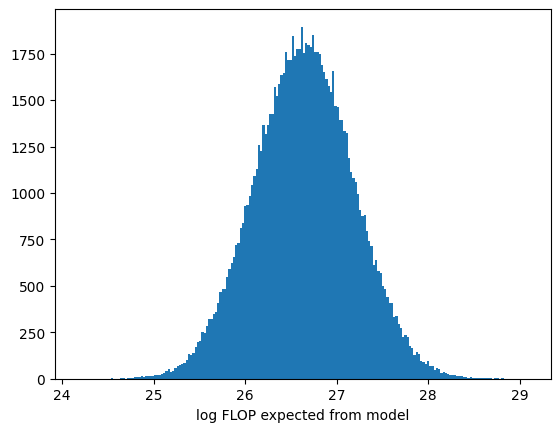

In [12]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1.2*B, 5*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_mistral_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$255.4 million (80%CI: $73.7 million to $886.7 million)

{1: '27.1 million',
 5: '51.7 million',
 10: '73.7 million',
 20: '112.7 million',
 30: '153.9 million',
 40: '199.5 million',
 50: '255.6 million',
 60: '327.2 million',
 70: '424.0 million',
 80: '576.0 million',
 90: '886.7 million',
 95: '1.3 billion',
 99: '2.4 billion'}



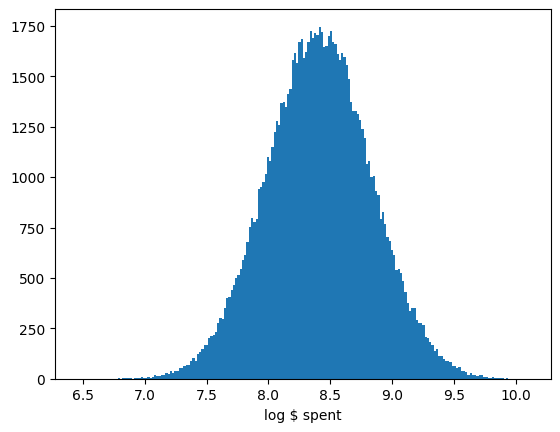



## FLOP ESTIMATE ##

27.21 log FLOP (80%CI: 26.49 to 27.92 log FLOP)

{1: 25.91,
 5: 26.29,
 10: 26.49,
 20: 26.74,
 30: 26.91,
 40: 27.07,
 50: 27.21,
 60: 27.35,
 70: 27.5,
 80: 27.68,
 90: 27.92,
 95: 28.12,
 99: 28.5}



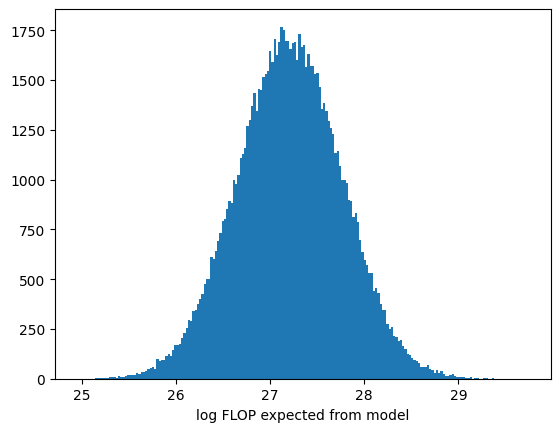

In [13]:
largest_xai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(4*B, 20*B, credibility=80),
                                                                    total_revenue=0,
                                                                    percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                    percent_revenue_that_is_profit=0,
                                                                    percent_profit_spent_this_year=0,
                                                                    percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                    percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_xai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$28.0 million (80%CI: $1.6 million to $484.9 million)

{1: '154.1 thousand',
 5: '717.0 thousand',
 10: '1.6 million',
 20: '4.3 million',
 30: '8.7 million',
 40: '15.9 million',
 50: '27.9 million',
 60: '49.1 million',
 70: '90.4 million',
 80: '183.3 million',
 90: '484.9 million',
 95: '1.1 billion',
 99: '5.0 billion'}



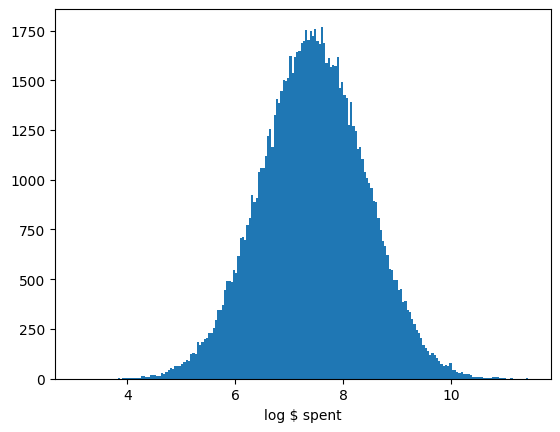



## FLOP ESTIMATE ##

26.25 log FLOP (80%CI: 24.92 to 27.58 log FLOP)

{1: 23.86,
 5: 24.55,
 10: 24.92,
 20: 25.38,
 30: 25.7,
 40: 25.99,
 50: 26.25,
 60: 26.5,
 70: 26.79,
 80: 27.12,
 90: 27.58,
 95: 27.95,
 99: 28.66}



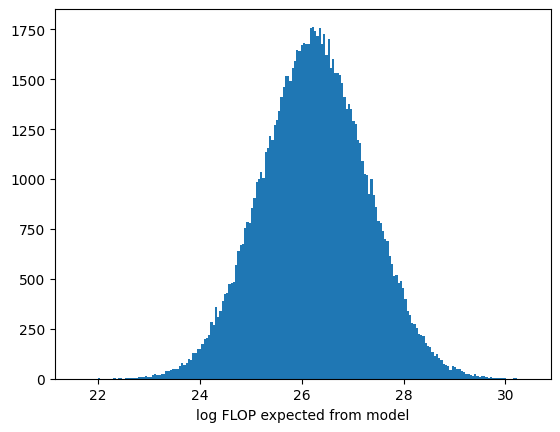

In [14]:
largest_us_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 20*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                     percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
show_model_forecast(largest_us_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$478.9 thousand (80%CI: $96.1 thousand to $2.5 million)

{1: '29.1 thousand',
 5: '62.9 thousand',
 10: '96.1 thousand',
 20: '163.7 thousand',
 30: '241.6 thousand',
 40: '338.9 thousand',
 50: '467.1 thousand',
 60: '643.9 thousand',
 70: '912.6 thousand',
 80: '1.4 million',
 90: '2.5 million',
 95: '4.0 million',
 99: '9.9 million'}



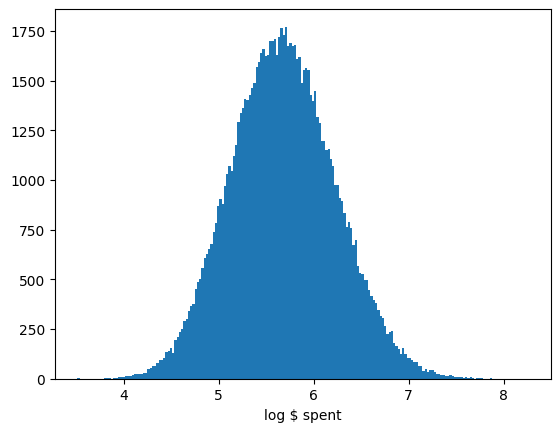



## FLOP ESTIMATE ##

24.48 log FLOP (80%CI: 23.64 to 25.33 log FLOP)

{1: 22.98,
 5: 23.41,
 10: 23.64,
 20: 23.92,
 30: 24.13,
 40: 24.31,
 50: 24.47,
 60: 24.64,
 70: 24.82,
 80: 25.04,
 90: 25.33,
 95: 25.58,
 99: 26.04}



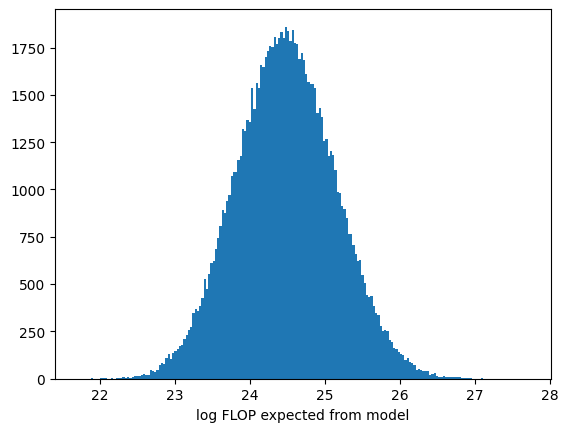

In [15]:
largest_uk_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 1*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.01))
show_model_forecast(largest_uk_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$4.3 million (80%CI: $146.8 thousand to $124.6 million)

{1: '9.2 thousand',
 5: '56.1 thousand',
 10: '146.8 thousand',
 20: '474.6 thousand',
 30: '1.1 million',
 40: '2.2 million',
 50: '4.3 million',
 60: '8.4 million',
 70: '16.9 million',
 80: '39.1 million',
 90: '124.6 million',
 95: '322.7 million',
 99: '2.0 billion'}



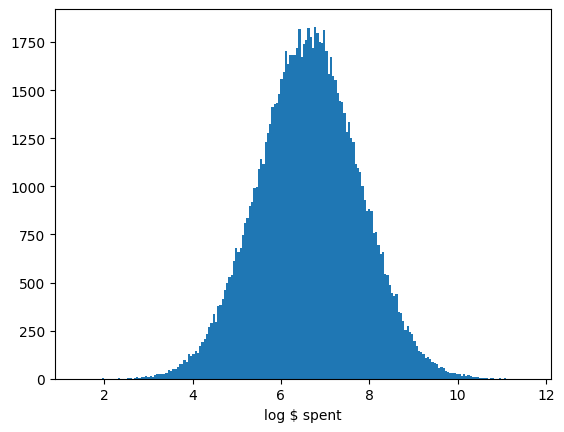



## FLOP ESTIMATE ##

25.43 log FLOP (80%CI: 23.9 to 26.97 log FLOP)

{1: 22.65,
 5: 23.47,
 10: 23.9,
 20: 24.42,
 30: 24.81,
 40: 25.13,
 50: 25.43,
 60: 25.74,
 70: 26.06,
 80: 26.44,
 90: 26.97,
 95: 27.4,
 99: 28.24}



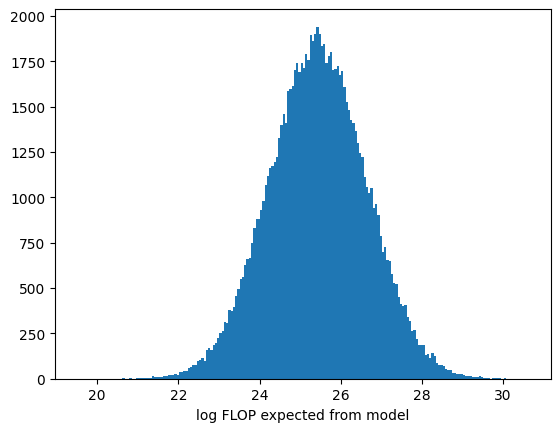

In [16]:
largest_china_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 50*B, credibility=80),
                                                                        percent_r_and_d_on_ai=1,
                                                                        percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                        percent_compute_on_biggest_model=pct_dist(0.01, 0.1))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_china_gov_prediction = sq.dist_max(0, largest_china_gov_prediction - sq.norm(0.5, 1.5, lclip=0.05, rclip=1))

show_model_forecast(largest_china_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$21.8 million (80%CI: $3.0 million to $299.2 million)

{1: '1.3 million',
 5: '2.2 million',
 10: '3.0 million',
 20: '4.7 million',
 30: '6.8 million',
 40: '9.7 million',
 50: '14.3 million',
 60: '23.5 million',
 70: '45.0 million',
 80: '98.7 million',
 90: '299.2 million',
 95: '730.6 million',
 99: '3.7 billion'}



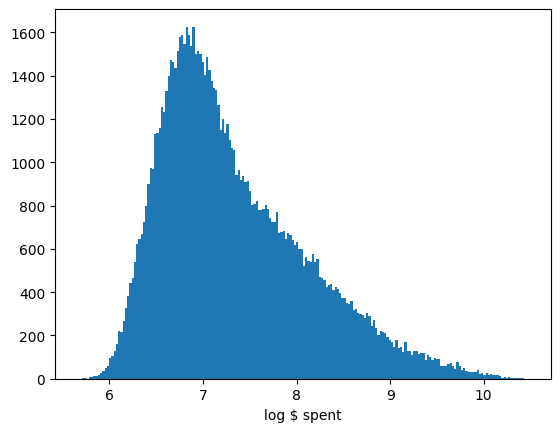



## FLOP ESTIMATE ##

26.14 log FLOP (80%CI: 25.14 to 27.36 log FLOP)

{1: 24.57,
 5: 24.93,
 10: 25.14,
 20: 25.4,
 30: 25.61,
 40: 25.81,
 50: 26.01,
 60: 26.23,
 70: 26.5,
 80: 26.85,
 90: 27.36,
 95: 27.77,
 99: 28.5}



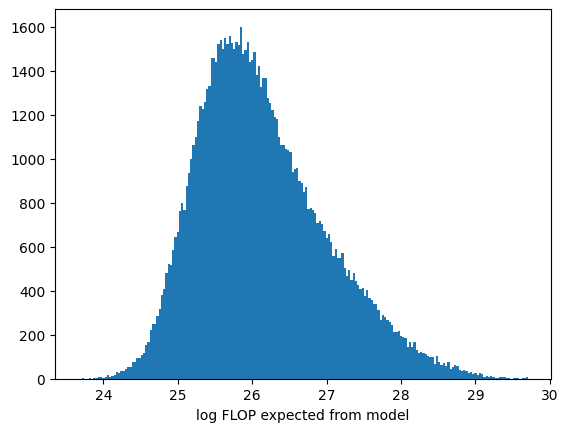

In [17]:
largest_arab_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(30*B, 50*B, credibility=80),
                                                                       percent_r_and_d_on_ai=1,
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.0001, 0.05))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_arab_gov_prediction = sq.dist_max(0, largest_arab_gov_prediction - sq.norm(0.05, 1, lclip=0.05, rclip=1))

show_model_forecast(largest_arab_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$922.9 million (80%CI: $308.2 million to $3.3 billion)

{1: '159.4 million',
 5: '242.5 million',
 10: '308.2 million',
 20: '420.2 million',
 30: '533.4 million',
 40: '665.5 million',
 50: '824.1 million',
 60: '1.0 billion',
 70: '1.4 billion',
 80: '1.9 billion',
 90: '3.3 billion',
 95: '5.2 billion',
 99: '13.2 billion'}



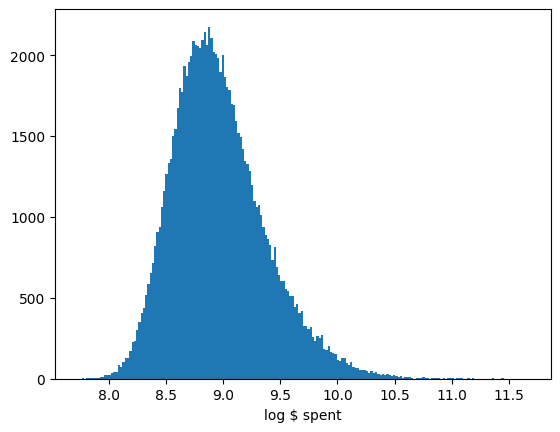



## FLOP ESTIMATE ##

27.76 log FLOP (80%CI: 27.09 to 28.47 log FLOP)

{1: 26.59,
 5: 26.91,
 10: 27.09,
 20: 27.31,
 30: 27.47,
 40: 27.61,
 50: 27.74,
 60: 27.88,
 70: 28.03,
 80: 28.21,
 90: 28.47,
 95: 28.7,
 99: 29.17}



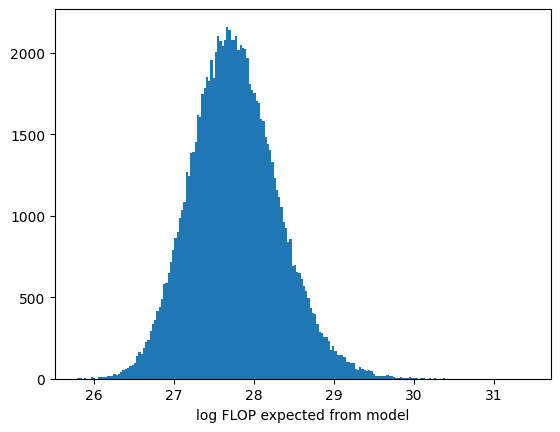

In [18]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_xai_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(largest_amazon_model_prediction) >>
               sq.dist_max(largest_us_gov_prediction) >>
               sq.dist_max(largest_uk_gov_prediction) >>
               sq.dist_max(largest_arab_gov_prediction) >>
               sq.dist_max(largest_china_gov_prediction))

show_model_forecast(mixed_model @ (100*K))

In [19]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['xAI', largest_xai_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['Amazon', largest_amazon_model_prediction],
          ['US', largest_us_gov_prediction],
          ['UK', largest_uk_gov_prediction],
          ['Arab', largest_arab_gov_prediction],
          ['China', largest_china_gov_prediction]]

print('## % of having largest model ##')
labels = [m[0] for m in models]
model_sizes_log = np.array([m[1] @ 100_000 for m in models])
max_indices = np.argmax(model_sizes_log, axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
pprint(label_percentages)
print('')
print('')

print('## % of being frontier (within 1 OOM of largest model) ##')
max_log_sizes = np.max(model_sizes_log, axis=0)
within_one_OOM = (model_sizes_log >= (max_log_sizes - 1))
within_one_OOM_counts = np.sum(within_one_OOM, axis=1)
total_samples = model_sizes_log.shape[1]  # Total number of samples
label_percentages_within_one_OOM = {label: f"{round((count / total_samples) * 100, 1)}%" for label, count in zip(labels, within_one_OOM_counts)}
pprint(label_percentages_within_one_OOM)

## % of having largest model ##
{'Amazon': '6.9%',
 'Anthropic': '5.4%',
 'Arab': '5.5%',
 'China': '2.8%',
 'Google': '19.7%',
 'Meta': '10.2%',
 'Microsoft': '4.8%',
 'Mistral': '2.0%',
 'OpenAI': '13.8%',
 'US': '7.8%',
 'xAI': '21.2%'}


## % of being frontier (within 1 OOM of largest model) ##
{'Amazon': '38.0%',
 'Anthropic': '56.9%',
 'Arab': '22.9%',
 'China': '13.7%',
 'Google': '64.0%',
 'Meta': '40.5%',
 'Microsoft': '28.0%',
 'Mistral': '43.4%',
 'OpenAI': '72.3%',
 'UK': '0.0%',
 'US': '32.3%',
 'xAI': '80.2%'}


## Cache spend model

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.2,
 5: 8.4,
 10: 8.5,
 20: 8.6,
 30: 8.7,
 40: 8.8,
 50: 8.9,
 60: 9.0,
 70: 9.1,
 80: 9.3,
 90: 9.5,
 95: 9.7,
 99: 10.1}


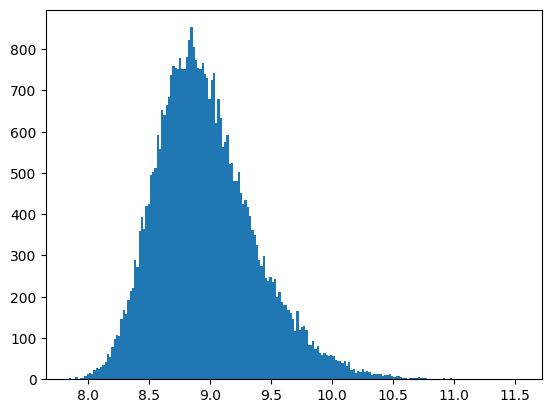

In [20]:
# Output expected willingness to pay for a model in 2025, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## Appendix

## SPEND ESTIMATE ##

$5.0 billion (80%CI: $2.6 billion to $9.7 billion)

{1: '1.5 billion',
 5: '2.1 billion',
 10: '2.6 billion',
 20: '3.2 billion',
 30: '3.8 billion',
 40: '4.4 billion',
 50: '5.0 billion',
 60: '5.7 billion',
 70: '6.5 billion',
 80: '7.7 billion',
 90: '9.7 billion',
 95: '11.7 billion',
 99: '16.5 billion'}



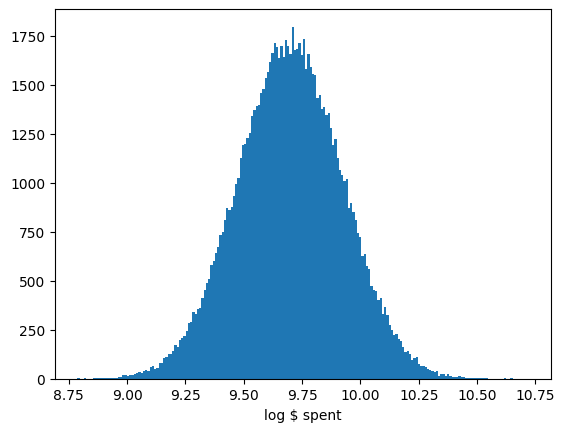



## FLOP ESTIMATE ##

28.5 log FLOP (80%CI: 27.95 to 29.05 log FLOP)

{1: 27.5,
 5: 27.79,
 10: 27.95,
 20: 28.14,
 30: 28.27,
 40: 28.39,
 50: 28.5,
 60: 28.6,
 70: 28.72,
 80: 28.86,
 90: 29.05,
 95: 29.2,
 99: 29.49}



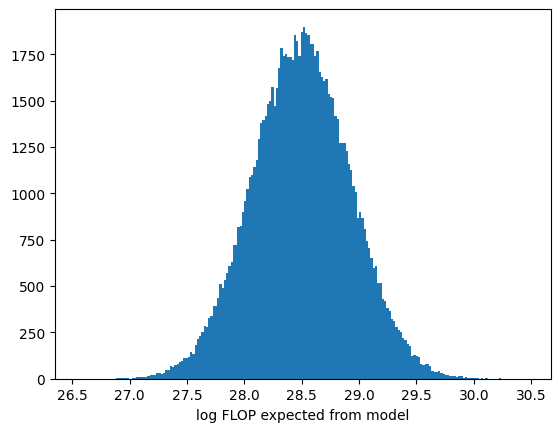

In [21]:
stargate = lab_spend_on_largest_model_this_year(total_investment=100*B,
                                                total_revenue=0,
                                                percent_investment_spent_this_year=1,
                                                percent_revenue_that_is_profit=0,
                                                percent_profit_spent_this_year=0,
                                                percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(stargate @ (100*K))

In [22]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-08-31 10:35:15.557566
